# WGAN-GP Horses Training

In [1]:
import torch as t
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import DataLoader
from models.GAN import build_generator, build_critic
from torchvision import datasets, transforms


In [2]:
bs = 128
z_dim = 100

transform = transforms.Compose([transforms.ToTensor()])
ds = datasets.CIFAR10(root='./data', download=True, transform=transform)
ds.targets = t.tensor(ds.targets)
idx = ds.targets == 7  # 7 is the label for horses
ds.targets = ds.targets[idx]
ds.data = ds.data[idx.numpy().astype(np.bool)]
dl = DataLoader(dataset=ds, batch_size=bs, shuffle=True, drop_last=True)


Files already downloaded and verified


In [3]:
def plot_tensor(x):
    _, ax = plt.subplots(figsize=(3, 3))
    def image2np(image):
        res = image.permute(1, 2, 0)
        return res[..., 0] if res.shape[2] == 1 else res
    ax.imshow(image2np(t.from_numpy(x.cpu().detach().numpy())), cmap="viridis", alpha=None)
    plt.show()


In [4]:
generator = build_generator(gen_init_size=(128, 4, 4), gen_upsample_flags=[True, True, True, False],
                            gen_c=[128, 64, 32, 3], gen_ks=[5, 5, 5, 5], gen_strides=[1, 1, 1, 1],
                            gen_pads=[2, 2, 2, 2], z_dim=z_dim, output_act=t.nn.Tanh, 
                            leaky_relu=True, first_gen_c=128)

critic = build_critic(ds[0][0][None], critic_c=[3, 32, 64, 128, 128], critic_ks=[5, 5, 5, 5],
                      critic_strides=[2, 2, 2, 1], critic_pads=[2, 2, 2, 2], wgan=True, wgan_gp=True, leaky_relu=True)

g_opt = t.optim.Adam(generator.parameters(), lr=5e-5, betas=(.0, .999))
c_opt = t.optim.Adam(critic.parameters(), lr=5e-5, betas=(.0, .999))
device = t.device('cuda') if t.cuda.is_available() else 'cpu'
generator.cuda(device)
critic.cuda(device)


Sequential(
  (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (1): LeakyReLU(negative_slope=0.2)
  (2): Dropout(p=0.4)
  (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (4): LeakyReLU(negative_slope=0.2)
  (5): Dropout(p=0.4)
  (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (7): LeakyReLU(negative_slope=0.2)
  (8): Dropout(p=0.4)
  (9): Conv2d(128, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (10): LeakyReLU(negative_slope=0.2)
  (11): Dropout(p=0.4)
  (12): Flatten()
  (13): Linear(in_features=2048, out_features=1, bias=True)
)

In [5]:
def gradient_penalty(critic, real, gen):
    alpha = t.randn(bs, 1, 1, 1).to(device)
    interpolates = (alpha * real + (1 - alpha) * gen).requires_grad_(True)
    c_interpolates = critic(interpolates)   

    gradients = t.autograd.grad(
        outputs=c_interpolates,
        inputs=interpolates,
        grad_outputs=t.ones(bs, 1).to(device),
        create_graph=True
    )[0]
    
    gradients = gradients.view(gradients.size(0), -1)
    return ((gradients.norm(dim=1) - 1) ** 2).mean()


  0%|          | 0/12000 [00:00<?, ?it/s]/home/p/.installed_software/anaconda3/lib/python3.7/site-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.UpsamplingBilinear2d is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
  8%|▊         | 999/12000 [2:27:47<26:40:19,  8.73s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(26.7376, device='cuda:0')


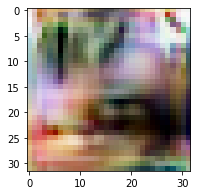

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


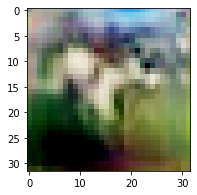

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


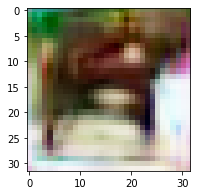

 17%|█▋        | 1999/12000 [4:54:59<24:25:27,  8.79s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(16.1162, device='cuda:0')


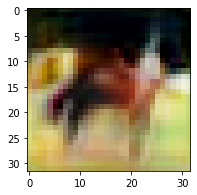

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


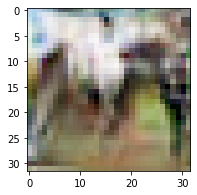

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


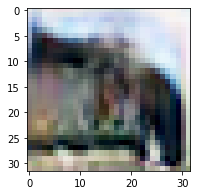

 25%|██▍       | 2999/12000 [7:18:55<22:29:31,  9.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(20.4746, device='cuda:0')


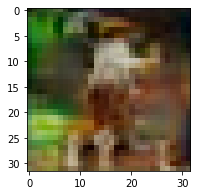

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


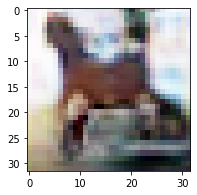

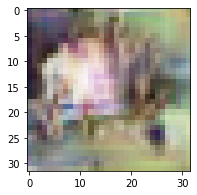

 33%|███▎      | 3999/12000 [9:45:52<19:05:16,  8.59s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(11.8948, device='cuda:0')


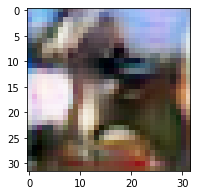

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


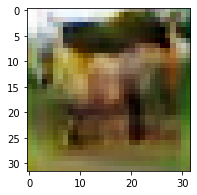

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


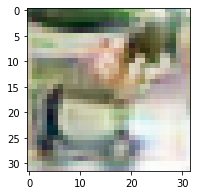

 42%|████▏     | 4999/12000 [12:13:49<17:24:03,  8.95s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(26.6975, device='cuda:0')


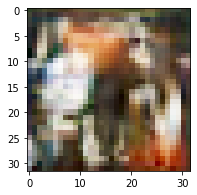

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


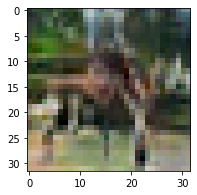

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


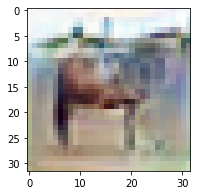

 50%|████▉     | 5999/12000 [14:42:22<14:57:18,  8.97s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(23.1985, device='cuda:0')


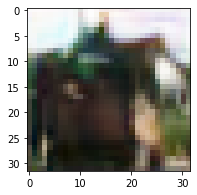

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


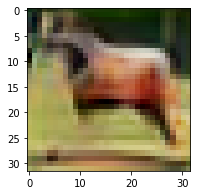

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


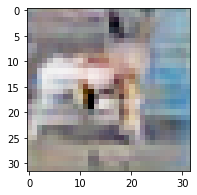

 58%|█████▊    | 6999/12000 [17:10:54<11:54:04,  8.57s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(13.5846, device='cuda:0')


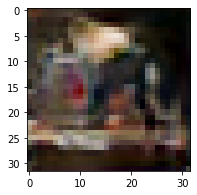

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


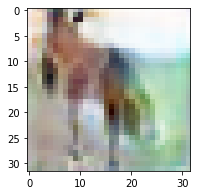

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


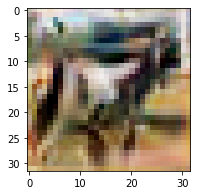

 67%|██████▋   | 7999/12000 [19:38:52<9:49:05,  8.83s/it] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(11.4935, device='cuda:0')


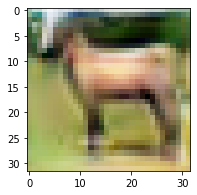

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


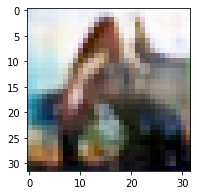

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


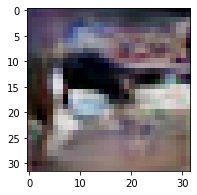

 75%|███████▍  | 8999/12000 [22:07:30<7:29:55,  9.00s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(14.6507, device='cuda:0')


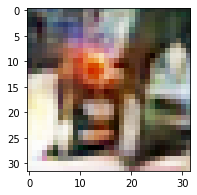

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


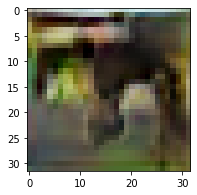

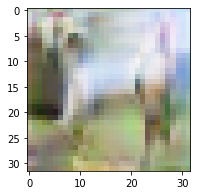

 83%|████████▎ | 9999/12000 [24:36:01<4:52:47,  8.78s/it]Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(11.9903, device='cuda:0')


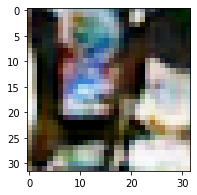

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


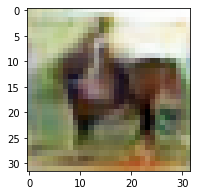

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


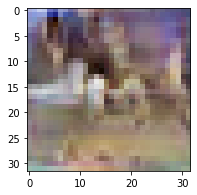

 92%|█████████▏| 10999/12000 [27:01:02<2:27:37,  8.85s/it]

latest lipschitz mean is  tensor(12.5743, device='cuda:0')


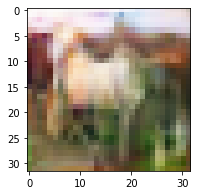

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


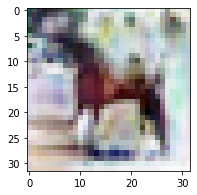

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


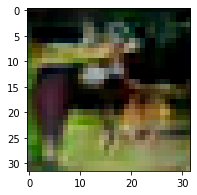

100%|█████████▉| 11999/12000 [29:24:29<00:03,  3.98s/it]  Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


latest lipschitz mean is  tensor(16.9066, device='cuda:0')


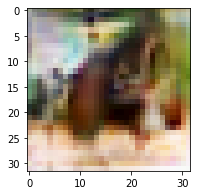

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


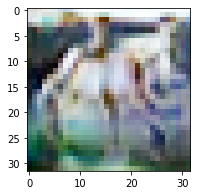

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


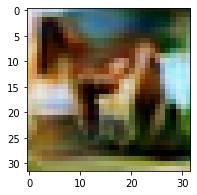

100%|██████████| 12000/12000 [29:24:34<00:00,  4.10s/it]


In [6]:
for epoch in tqdm(range(1, 12001)):
    if epoch % 6000 == 0:
        g_opt = t.optim.Adam(generator.parameters(), lr=4e-5, betas=(.0, .999))
        c_opt = t.optim.Adam(critic.parameters(), lr=4e-5, betas=(.0, .999))

    for i, (imgs, _) in enumerate(dl):
        # train critic
        real_imgs = imgs.to(device)
        randn = t.randn(bs, z_dim)
        gen_imgs = generator(randn.to(device))

        c_opt.zero_grad()
        ri_pred = critic(real_imgs)
        gi_pred = critic(gen_imgs)
        gp_lambda = 10 # hyperparam
        gp_loss = gp_lambda * gradient_penalty(critic, real_imgs.data, gen_imgs.data)
        c_loss = -t.mean(ri_pred) + t.mean(gi_pred) + gp_loss
        c_loss.backward()
        c_opt.step()

        # train generator
        if i % 5 == 0:
            gen_imgs = generator(randn.to(device))
            g_opt.zero_grad()
            gi_critic_pred = critic(gen_imgs)
            g_loss = -t.mean(gi_critic_pred)
            g_loss.backward()
            g_opt.step()

    if epoch % 1000 == 0:
        lipschitz = t.abs(ri_pred.data - gi_pred.data) / t.mean(t.abs(real_imgs.data - gen_imgs.data))
        print('latest lipschitz mean is ', lipschitz.mean())

        for img in generator(t.randn(3, z_dim).to(device)):
            plot_tensor(img)



In [7]:
t.save(generator.state_dict(), 'models/state_dicts/04_03_horse_gen.pth')
t.save(critic.state_dict(), 'models/state_dicts/04_03_horse_critic.pth')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

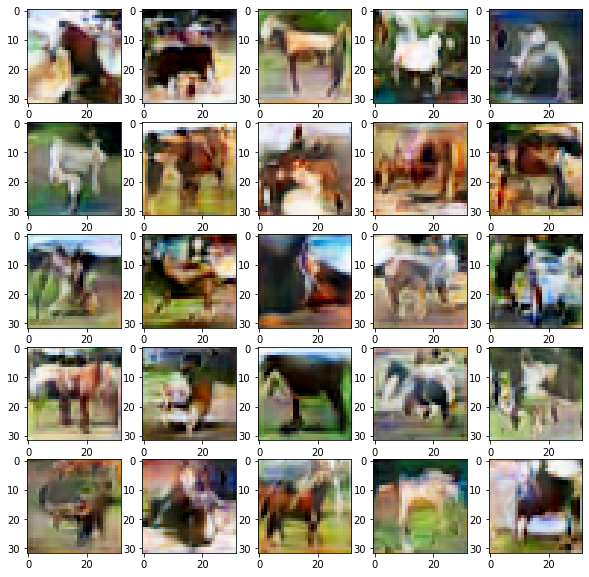

In [8]:
row, col = 5, 5

f, axarr = plt.subplots(row, col, figsize=(10, 10))

for r in range(row):
    for c in range(col):
        images = generator(t.randn(2, z_dim).to(device)).cpu().detach()[0].permute(1, 2, 0)
        axarr[r, c].imshow(images)